# Scikit Learn

# Régression sur le prix des maisons à boston

## 1) Import de dataset

In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

boston = datasets.load_boston()
X = boston["data"]
y = boston["target"]



## 2) separer le jeu d'apprentissage du jeu de test

In [3]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## 3) Standardiser les valeurs

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

## 4) choisir un algo et le tester
exemple : Support Vector Machine

In [10]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

from sklearn.model_selection import  cross_val_score
cross_val_score(svr, X, y, n_jobs=-1)

array([0.77285459, 0.72771739, 0.56131914, 0.15056451, 0.08212844])

## 5) aller au delà des paramètres par défaut avec un grid search

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.6173146856833553 SVR(gamma=0.1)


## 5.1) affiner le grid search

In [17]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.6725273811239963 SVR(C=1.5, gamma=0.1)


In [18]:
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.7589863387457337 SVR(C=2.5, gamma=0.05)


In [19]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.7860451947718669 SVR(C=4, degree=1, gamma=0.05)


In [20]:
parameters = {  'C'       : [4, 5, 6, 7]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03, 0.05, 0.07],
                 "degree" : [1,2, 3]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.805344266224077 SVR(C=7, degree=1, gamma=0.03)


In [21]:
parameters = {  'C'       : [10, 15, 20, 30]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15],
                 "degree" : [1,2]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.8309789798361102 SVR(C=30, degree=1, epsilon=0.15, gamma=0.03)


In [22]:
parameters = {  'C'       : [190, 200, 250, 260]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [1.5, 2, 2.5],
                 "degree" : [1,2]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.8529818558944167 SVR(C=190, degree=1, epsilon=1.5, gamma=0.03)


In [23]:
# Exercice => tester vos propres paramètres

# On aurait pu faire une fonction de test : 

In [25]:
def test_hyperparametres(hyperparametres):
    grid       = GridSearchCV(svm.SVR(), hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_
    

In [26]:
hyperparametres = {  'gamma' : [0.01, 0.1, 0.5, 0.015]          ,
                  "kernel" : ['linear', 'poly', 'rbf', 'sigmoid',  ],
                  "C" : [105, 200]}
test_hyperparametres(hyperparametres)

0.8449421228300483 SVR(C=200, gamma=0.015)


(0.8449421228300483, SVR(C=200, gamma=0.015))

In [27]:
from sklearn.linear_model import Lasso

In [28]:
def test_hyperparametres(algo, hyperparametres):
    grid       = grid_search.GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_


In [30]:
algo = Lasso()
params = {"max_iter" : [ 1000],
         "alpha" : [0.1], 
         "selection": ["random", "cyclic"]}
grid       = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)    


0.7441994477257756 Lasso(alpha=0.1)


# Import de xgboost

In [31]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 2.1 MB/s eta 0:00:01


In [34]:
!brew install libomp

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 3 taps (homebrew/core, homebrew/cask and homebrew/services).
==> New Formulae
arturo              foreman             libpciaccess        pickle
bit-git             fpart               libslirp            postgresql@12
blaze               gcalcli             matplotplusplus     protoc-gen-go-grpc
box2d               gitlint             ncspot              rain
cvs-fast-export     googletest          nicotine-plus       taskwarrior-tui
device-mapper       gost                node@14             tfsec
dotnet              isort               openjdk@8           vint
envoy               libdrm              or-tools            zsh-you-should-use
fnm                 libfuse             pdm
==> Updated Formulae
Updated 998 formulae.
==> Deleted Formulae
boost@1.55                 meson-internal             woboq_codebrowser
boost@1.59                 mysql-connector-c++@1.1
llvm@6                     scw@1
==> New Casks
aio-creator-neo  

In [35]:
from xgboost import XGBRegressor
algo = XGBRegressor()

In [37]:
default_hyperparameters = algo.get_params()
espace_de_Recherche = {}
for i, hyperparam in enumerate(default_hyperparameters):
    default_value = default_hyperparameters[hyperparam]
    if default_value:
        if type(default_value) == int:
            delta = default_value * 2
            valeurs_de_recherches = [default_value-delta,default_value, default_value+ delta]
        if type(default_value) == float:
            delta = default_value * 0.1
            valeurs_de_recherches = [default_value-delta,default_value, default_value+ delta]
        if type(default_value) == bool:
            valeurs_de_recherches = [True, False]
        espace_de_Recherche[hyperparam]=valeurs_de_recherches
        print(hyperparam, default_value, valeurs_de_recherches)
espace_de_Recherche["n_jobs"]=[-1]

NameError: name 'valeurs_de_recherches' is not defined

In [41]:
def test_hyperparametres(algo, hyperparametres):
    grid       = GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_


In [42]:
espace_de_Recherche = {
    "max_depth" : [1,5,10],
    "gamma" : [0.5, 1, 1.1, 1.2, 1.5]
}
test_hyperparametres(XGBRegressor(), espace_de_Recherche)

0.8203587371796018 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


(0.8203587371796018,
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))

In [43]:
modele = algo.fit(X_train, y_train)

modele.score(X_test, y_test)

0.8466652139081778

# 6) tester tous les algorithmes

In [44]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print( e)
        if verbose: print ("="*30)
    return algos

In [45]:
algos = get_sklearn_algorithms()
algos

defaultdict(list,
            {'feature_extraction': [sklearn.feature_extraction._dict_vectorizer.DictVectorizer,
              sklearn.feature_extraction._hash.FeatureHasher],
             'linear_model': [sklearn.linear_model._bayes.ARDRegression,
              sklearn.linear_model._bayes.BayesianRidge,
              sklearn.linear_model._coordinate_descent.ElasticNet,
              sklearn.linear_model._coordinate_descent.ElasticNetCV,
              sklearn.linear_model._glm.glm.GammaRegressor,
              sklearn.linear_model._huber.HuberRegressor,
              sklearn.linear_model._least_angle.Lars,
              sklearn.linear_model._least_angle.LarsCV,
              sklearn.linear_model._coordinate_descent.Lasso,
              sklearn.linear_model._coordinate_descent.LassoCV,
              sklearn.linear_model._least_angle.LassoLars,
              sklearn.linear_model._least_angle.LassoLarsCV,
              sklearn.linear_model._least_angle.LassoLarsIC,
              sklearn.

## Liste les algorithmes

In [46]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> feature_extraction
DictVectorizer,FeatureHasher

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,GammaRegressor,HuberRegressor,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,PoissonRegressor,RANSACRegressor,Ridge,RidgeCV,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SGDRegressor,TheilSenRegressor,TweedieRegressor

===> model_selection
GridSearchCV,RandomizedSearchCV

===> preprocessing
Binarizer,FunctionTransformer,KBinsDiscretizer,KernelCenterer,LabelBinarizer,LabelEncoder,MaxAbsScaler,MinMaxScaler,MultiLabelBinarizer,Normalizer,OneHotEncoder,OrdinalEncoder,PolynomialFeatures,PowerTransformer,QuantileTransformer,RobustScaler,StandardScaler

===> svm
LinearSVC,LinearSVR,NuSVC,NuSVR,OneClassSVM,SVC

## supprimer les warnings dans jupyter

In [47]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Utiliser chaque algo et conserver les performances

In [48]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print ("="*30)
    

Transforms lists of featu
'numpy.ndarray' object has no attribute 'items'
Implements feature hashin
'FeatureHasher' object has no attribute 'score'
Bayesian ARD regression.
0.6304276088087879
Bayesian ridge regression
0.6335220593780816
Linear regression with co
0.5187732792179512
Elastic Net model with it
0.6327478175522371
Generalized Linear Model
0.5474184928346455
Linear regression model t
0.5968552325995591
Least Angle Regression mo
0.6365087793912102
Cross-validated Least Ang
0.5890827698008859
Linear Model trained with
0.5754689471614245
Lasso linear model with i
0.6316320582295359
Lasso model fit with Leas
-0.019199558983028497
Cross-validated Lasso, us
0.631721248924312
Lasso model fit with Lars
0.5966701656339571
Ordinary least squar
0.6365087793912108
Logistic Regression
Algo de classification
Logistic Regression CV (a
Algo de classification
Multi-task ElasticNet mod
For mono-task outputs, use ElasticNet
Multi-task L1/L2 ElasticN
For mono-task outputs, use ElasticNetCV
Multi

/Applications/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Applications/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Applications/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Applications/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py

## meilleur algo

In [49]:
best_algorithm, best_perf

(PoissonRegressor(), 0.7003224796578386)

## Performances de chaque algo :

In [50]:
performances

{'Bayesian ARD regression.': [0.6304276088087879],
 'Bayesian ridge regression': [0.6335220593780816],
 'Linear regression with co': [0.5187732792179512],
 'Elastic Net model with it': [0.6327478175522371],
 'Generalized Linear Model': [0.500169912156526],
 'Linear regression model t': [0.5968552325995591],
 'Least Angle Regression mo': [0.6365087793912102],
 'Cross-validated Least Ang': [0.5890827698008859],
 'Linear Model trained with': [0.5754689471614245],
 'Lasso linear model with i': [0.6316320582295359],
 'Cross-validated Lasso, us': [0.631721248924312],
 'Lasso model fit with Lars': [0.5966701656339571],
 'Ordinary least squar': [0.6365087793912108],
 'Orthogonal Matching Pursu': [0.5014161337075301],
 'Cross-validated Orthogona': [0.5777550330301747],
 'Passive Aggressive Regres': [0.38647928223460704],
 'RANSAC (RANdom SAmple Con': [0.4951534141474737],
 'Linear least squares with': [0.6359958292945186],
 'Ridge regression with bui': [0.6307630183423659],
 'Linear model fitte

## on manipule les performances via panda

In [51]:
import pandas as pd

In [52]:
df = pd.DataFrame(performances).T

In [53]:
col_name = "performance"
df.columns = [col_name]

In [56]:
df.performance.sort_values()
df

,performance
Bayesian ARD regression.,0.630428
Bayesian ridge regression,0.633522
Linear regression with co,0.518773
Elastic Net model with it,0.632748
Generalized Linear Model,0.500170
Linear regression model t,0.596855
Least Angle Regression mo,0.636509
Cross-validated Least Ang,0.589083
Linear Model trained with,0.575469
Lasso linear model with i,0.631632


## calcul des gains de performance d'un algo l'autre

In [57]:
liste_des_performances = df.performance.values
gains = [0]
for indice, performance in enumerate(liste_des_performances):
    if indice>0:
        previous_value = liste_des_performances[indice-1]
        current_value  = liste_des_performances[indice]
        gain = (current_value - previous_value) / previous_value
        gains.append(round(gain*100, 2))
df["gains"] = gains

In [58]:
#

In [59]:
df

,performance,gains
Bayesian ARD regression.,0.630428,0.00
Bayesian ridge regression,0.633522,0.49
Linear regression with co,0.518773,-18.11
Elastic Net model with it,0.632748,21.97
Generalized Linear Model,0.500170,-20.95
Linear regression model t,0.596855,19.33
Least Angle Regression mo,0.636509,6.64
Cross-validated Least Ang,0.589083,-7.45
Linear Model trained with,0.575469,-2.31
Lasso linear model with i,0.631632,9.76


## Tracer les performances par algo

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [61]:
df = df.drop("gains", axis=1)

/Applications/anaconda3/envs/python38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


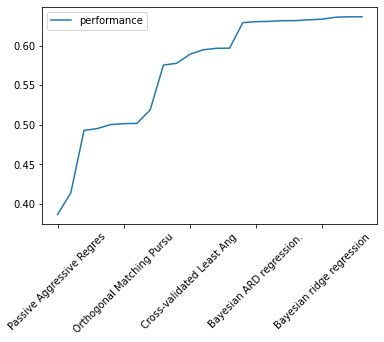

In [62]:
df = df.sort_values(col_name)
ax = df.plot(rot=45, x_compat=True)

### Augmentation du nombre de légend

/Applications/anaconda3/envs/python38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (24).

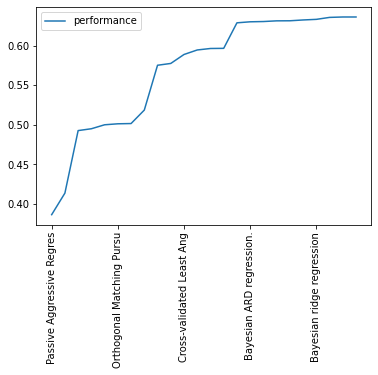

In [63]:
df = df.sort_values(col_name)
ax = df.plot(rot=90, x_compat=True)
ax.xaxis.set_ticklabels(df.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

### Rotation des infos sur x, et image plus large

<ipython-input-64-fd062812002c>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.xaxis.set_ticklabels(df.index)
/Applications/anaconda3/envs/python38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

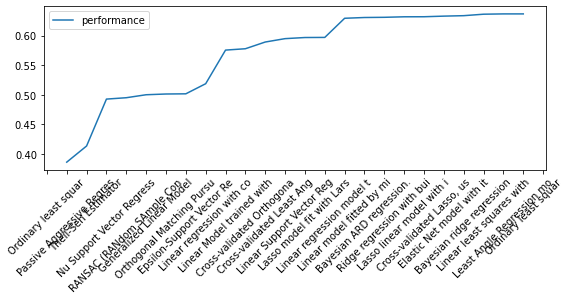

In [64]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(rot=45, ax=axes)


### affichage en barre

<ipython-input-65-28c9d528bd67>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.xaxis.set_ticklabels(df.index)


<AxesSubplot:>

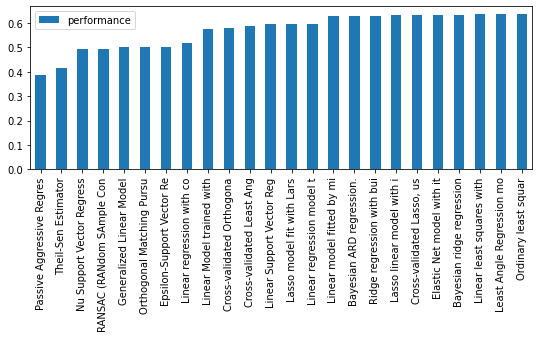

In [65]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(kind='bar', rot=90, ax=axes)

## on rajoute la perforamnce dans les labels

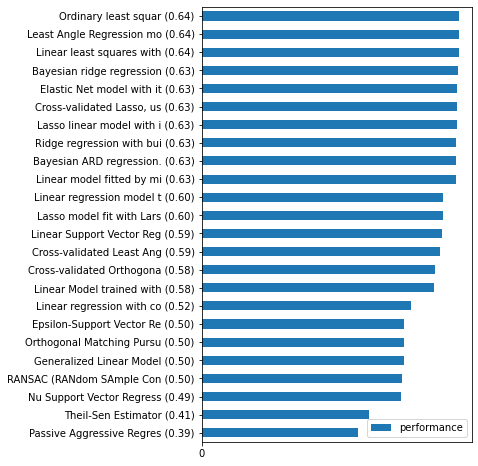

In [66]:
new_labels = []
for i, index in enumerate(df.index):
    new_label = "%s (%.2f)"%(index,df.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass

# 7) which scoring function ?

## on récupère les fonctions de score

In [70]:
def get_sklearn_score_functions(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions named as 'score'.
    
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ score_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if "score" in nom_fonction:
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print (e)
        if verbose: print ("="*30)
    return algos

In [71]:
scoring_modules = get_sklearn_score_functions(False)

In [72]:
scoring_modules.keys()

dict_keys(['metrics', 'model_selection'])

## on s'intéresse aux métriques

In [73]:
scoring_modules["metrics"]

[<module 'sklearn.metrics._scorer' from '/Applications/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/metrics/_scorer.py'>,
 <function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>,
 <function sklearn.metrics.cluster._supervised.adjusted_mutual_info_score(labels_true, labels_pred, *, average_method='arithmetic')>,
 <function sklearn.metrics.cluster._supervised.adjusted_rand_score(labels_true, labels_pred)>,
 <function sklearn.metrics._ranking.average_precision_score(y_true, y_score, *, average='macro', pos_label=1, sample_weight=None)>,
 <function sklearn.metrics._classification.balanced_accuracy_score(y_true, y_pred, *, sample_weight=None, adjusted=False)>,
 <function sklearn.metrics._classification.brier_score_loss(y_true, y_prob, *, sample_weight=None, pos_label=None)>,
 <function sklearn.metrics.cluster._unsupervised.calinski_harabasz_score(X, labels)>,
 <function sklearn.metrics._classification.cohen_kappa_score

# 8) tester les métriques sur un algo

In [74]:
from sklearn.ensemble import BaggingRegressor

# 8.1) l'algo a des performances variables

In [76]:
performances = {}
for i in range(10):
    algorithme = BaggingRegressor()
    algorithme.fit(X_train, y_train)
    performance = algorithme.score(X_test, y_test)
    print (i, performance)
    performances[i] = [performance]

0 0.8836933760766927
1 0.8277280070040662
2 0.8419316614580751
3 0.8270475928892489
4 0.8381554569681475
5 0.820113357040309
6 0.7669213781333432
7 0.8199964130332235
8 0.8285092089043162
9 0.7783609426598561


<AxesSubplot:>

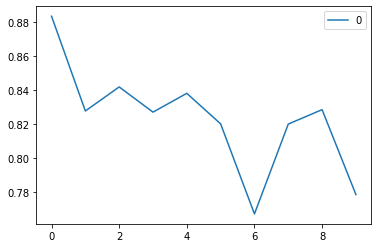

In [77]:
pd.DataFrame.from_dict(performances).T.plot()

## On peut calculer diverses métriques

In [78]:
y_pred = algorithme.predict(X_test)

In [80]:
score_par_metric = {}
for scoring_function in scoring_modules["metrics"]:
    try:
        info         = str(scoring_function)
        nom_metrique = info[info.find(" "):info.find(" at ")].strip()
        score_algo   = scoring_function(y_test, y_pred)
        score_par_metric[nom_metrique] =  [score_algo]
        print (nom_metrique, " => ", score_algo)
    except:
        pass

adjusted_mutual_info_score  =>  -0.0011038564614414543
adjusted_rand_score  =>  -0.0006888288518613945
completeness_score  =>  0.8969053615312395
explained_variance_score  =>  0.7857499533139587
fowlkes_mallows_score  =>  0.0
homogeneity_score  =>  0.9909664602022435
mutual_info_score  =>  4.5531292988693695
normalized_mutual_info_score  =>  0.941592666431038
r2_score  =>  0.7783609426598561
v_measure_score  =>  0.9415926664310381


/Applications/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass greater_is_better=[31.9  16.93 16.36 22.9  35.39 19.14 32.59 21.14 17.84 33.03 23.62 37.19
 41.06 19.62 15.84 30.11 20.72 42.91 24.08 12.19 10.65  8.99 33.31 20.79
 20.85 33.55 16.6  27.01 18.92 31.71 14.23 12.09 22.31 20.14 20.23 31.47
 23.91 20.67 17.27 33.1  17.58 22.11 17.99 20.33 20.27 45.71 23.04 12.72
 27.41 24.31 27.87 11.53 24.36 24.41 38.43 16.13 28.69 37.04 23.58 21.87
 22.47 42.81 23.85 22.95 34.76 20.6  16.85 20.12 15.12 18.61 23.73 19.71
 44.8  23.21 28.25 15.06 20.3  42.5  22.75 23.15 16.97 15.23 23.53 21.26
 19.41 10.83 21.54 21.57 40.97 24.55 29.24 14.94 23.78 15.74 17.83 23.64
 44.48 21.69 22.58 20.34 15.41 23.17 24.63 17.33 20.31 20.82 13.41 14.76
 17.01 23.57 17.68 20.11 18.39 21.23 19.75 17.65 13.9  34.48 31.9  27.06
 19.39 12.03 24.02 17.47 18.86  8.82 19.09 17.63 22.2  26.01 21.09 17.93
 21.1  12.68 19.64 17.82  9.83 23.59 20.23 30.03 25.87 29.87 

## on les manipule dans une dataframe pandas

In [81]:
df_metriques = pd.DataFrame.from_dict(score_par_metric).T

In [82]:
colonne_de_score = "score"
df_metriques.columns = [colonne_de_score]
df_metriques.sort_values(colonne_de_score)

,score
adjusted_mutual_info_score,-0.001104
adjusted_rand_score,-0.000689
fowlkes_mallows_score,0.000000
r2_score,0.778361
explained_variance_score,0.785750
completeness_score,0.896905
normalized_mutual_info_score,0.941593
v_measure_score,0.941593
homogeneity_score,0.990966
mutual_info_score,4.553129


## on peut les dessiner

<AxesSubplot:>

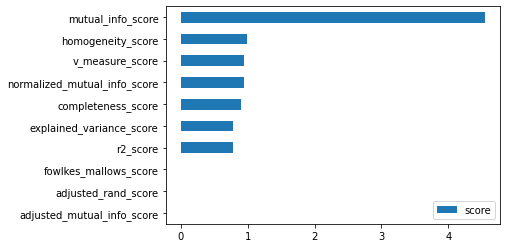

In [83]:
df_metriques.sort_values(by=colonne_de_score).plot(kind="barh")

# on s'intéresse en général au r2 et à la variance expliquée